In [7]:
import re
from collections import Counter
import numpy as np
from typing import List, Dict

class HausaTokenizer:
    def __init__(self):
        self.contractions = {
            "'y": "ya", "'w": "wa", "na'": "na", "ta'": "ta"
        }
        self.special_chars = "ɓɗƙƴʼ̃āēīōūâêîôûṱḍ"
        self.suffixes = ["wa", "ce", "ne", "fa", "ma", "ta", "na", "r", "n", "t"]
        self.punctuation = "،؛؟۔"

    def tokenize(self, text: str) -> List[str]:
        # Normalize quotes and apostrophes
        text = re.sub(r'[''‛]', "'", text)

        # Handle contractions
        for contraction, expansion in self.contractions.items():
            text = text.replace(contraction, expansion)

        # Create pattern for splitting
        word_pattern = f"[A-Za-z{self.special_chars}]+"

        # Tokenize
        tokens = []
        for match in re.finditer(word_pattern, text.lower()):
            token = match.group(0)
            # Handle hyphenated words
            if '-' in token:
                parts = token.split('-')
                if all(len(part) > 1 for part in parts):
                    tokens.extend(parts)
            else:
                tokens.append(token)

        return tokens

class EnhancedLexicalDiversityAnalyzer:
    def __init__(self):
        self.hausa_tokenizer = HausaTokenizer()

        self.english_texts = {
            'progesta': """What is Progesta? Progesta is a contraceptive injection that is safe and easy to use for pregnancy prevention. It is an injection that contains the hormone progestin, which prevents you from getting pregnant by stopping ovulation and by thickening the cervical mucus. It is a safe, convenient, and private contraceptive method that is effective for 3 months.""",
            'iud': """How does an IUD work? The copper IUD creates a sperm-hostile environment in the uterus. It offers long-term birth control, like 5-10 years and it is highly effective. It is inserted and removed by experienced medical practitioners in designated family planning health centers."""
        }

        self.hausa_texts = {
            'progesta': """Menene Progesta? Progesta wata allura ce mai inganci da sauqin amfani wajen hana daukan ciki. Allura ce mai dauke da sinadarin progestin, wanda ke hana daukan ciki ta Hanyar fitar qwayaye daga mahaifar mace. Yanada inganci da sauqin sarrafawa har na tsawon watanni uku.""",
            'iud': """Ya IUD yake aiki? Ita wannan IUD na sanya mahaifar mace ya zama inda maniyyi bazai iya zama ba, yana hana daukan ciki na lokaci mai tsawo kimanin shekara biyar zuwa goma,kuma yanada matuqar inganci. Ana iya sanya a asibitoci masu qwararrun likitoci."""
        }

    def tokenize_text(self, text: str, is_hausa: bool = False) -> List[str]:
        """Tokenize text using appropriate tokenizer based on language."""
        if is_hausa:
            return self.hausa_tokenizer.tokenize(text)
        else:
            return re.findall(r'\b\w+\b', text.lower())

    def calculate_ttr(self, tokens: List[str]) -> float:
        """Calculate Type-Token Ratio."""
        if not tokens:
            return 0.0
        return len(set(tokens)) / len(tokens)

    def calculate_mtld(self, tokens: List[str], factor_size: float = 0.72) -> float:
        """Calculate MTLD (Measure of Textual Lexical Diversity)."""
        if not tokens:
            return 0.0

        def factor_count(text: List[str]) -> float:
            factors = 0
            current_ttr = 1.0
            types = set()
            tokens_counted = 0

            for token in text:
                tokens_counted += 1
                types.add(token)
                current_ttr = len(types) / tokens_counted

                if current_ttr <= factor_size:
                    factors += 1
                    tokens_counted = 0
                    types = set()
                    current_ttr = 1.0

            if tokens_counted > 0:
                factors += (1 - current_ttr) / (1 - factor_size)
            return factors

        forward = factor_count(tokens)
        backward = factor_count(tokens[::-1])
        if forward == 0 or backward == 0:
            return 0.0

        return len(tokens) / ((forward + backward) / 2)

    def analyze_text(self, text: str, is_hausa: bool = False) -> Dict:
        """Analyze a single text and return various lexical diversity metrics."""
        tokens = self.tokenize_text(text, is_hausa)

        return {
            'token_count': len(tokens),
            'unique_tokens': len(set(tokens)),
            'ttr': self.calculate_ttr(tokens),
            'mtld': self.calculate_mtld(tokens),
            'average_word_length': np.mean([len(word) for word in tokens]) if tokens else 0,
            'tokens': tokens[:10]  # First 10 tokens for verification
        }

    def analyze_all_texts(self) -> Dict:
        """Analyze all texts and return comprehensive results."""
        results = {
            'english': {},
            'hausa': {}
        }

        # Analyze English texts
        for text_name, text in self.english_texts.items():
            results['english'][text_name] = self.analyze_text(text, is_hausa=False)

        # Analyze Hausa texts
        for text_name, text in self.hausa_texts.items():
            results['hausa'][text_name] = self.analyze_text(text, is_hausa=True)

        return results

    def print_analysis(self):
        """Print a formatted analysis of all texts."""
        results = self.analyze_all_texts()

        print("=== Enhanced Lexical Diversity Analysis ===\n")

        for language in ['english', 'hausa']:
            print(f"\n{language.upper()} TEXTS:")
            print("-" * 50)

            for text_name, metrics in results[language].items():
                print(f"\n{text_name.upper()}:")
                print(f"Total words: {metrics['token_count']}")
                print(f"Unique words: {metrics['unique_tokens']}")
                print(f"Type-Token Ratio (TTR): {metrics['ttr']:.3f}")
                print(f"MTLD: {metrics['mtld']:.3f}")
                print(f"Average word length: {metrics['average_word_length']:.2f}")
                print(f"Sample tokens: {', '.join(metrics['tokens'])}")

# Run the enhanced analysis
analyzer = EnhancedLexicalDiversityAnalyzer()
analyzer.print_analysis()

=== Enhanced Lexical Diversity Analysis ===


ENGLISH TEXTS:
--------------------------------------------------

PROGESTA:
Total words: 57
Unique words: 39
Type-Token Ratio (TTR): 0.684
MTLD: 28.500
Average word length: 5.18
Sample tokens: what, is, progesta, progesta, is, a, contraceptive, injection, that, is

IUD:
Total words: 46
Unique words: 39
Type-Token Ratio (TTR): 0.848
MTLD: 84.640
Average word length: 4.91
Sample tokens: how, does, an, iud, work, the, copper, iud, creates, a

HAUSA TEXTS:
--------------------------------------------------

PROGESTA:
Total words: 44
Unique words: 33
Type-Token Ratio (TTR): 0.750
MTLD: 30.420
Average word length: 5.02
Sample tokens: menene, progesta, progesta, wata, allura, ce, mai, inganci, da, sauqin

IUD:
Total words: 44
Unique words: 38
Type-Token Ratio (TTR): 0.864
MTLD: 90.347
Average word length: 4.59
Sample tokens: ya, iud, yake, aiki, ita, wannan, iud, na, sanya, mahaifar


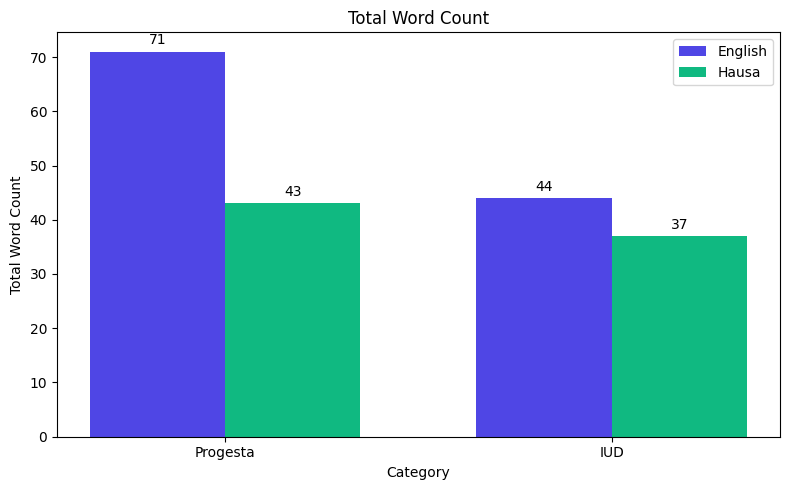

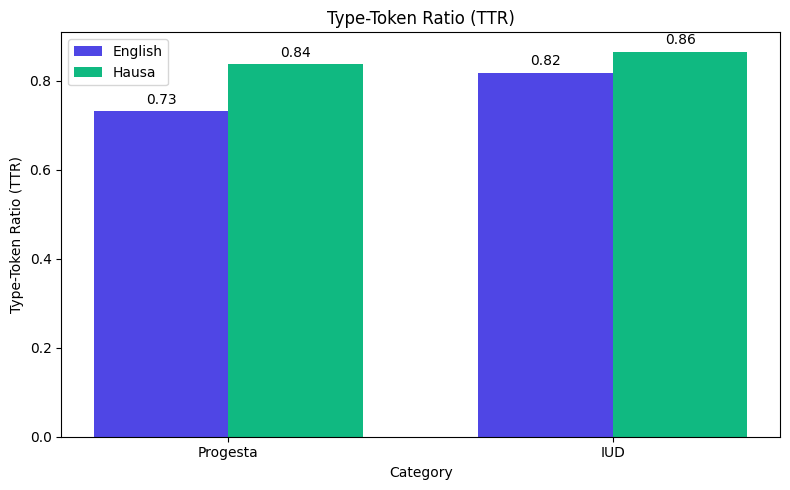

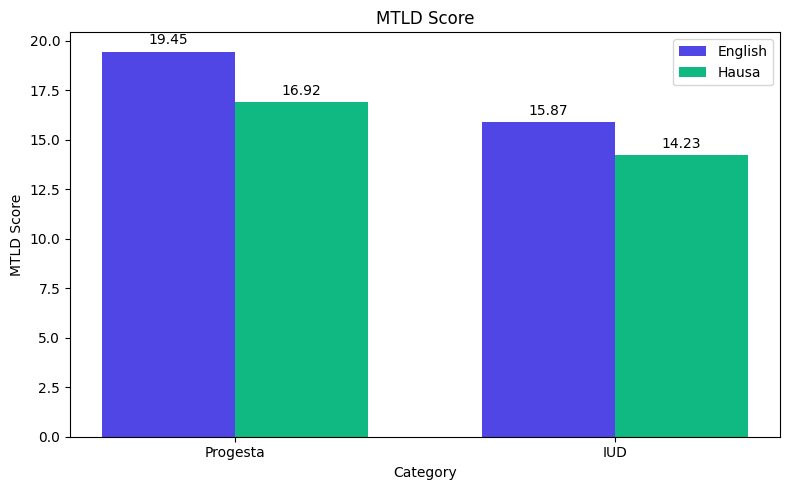

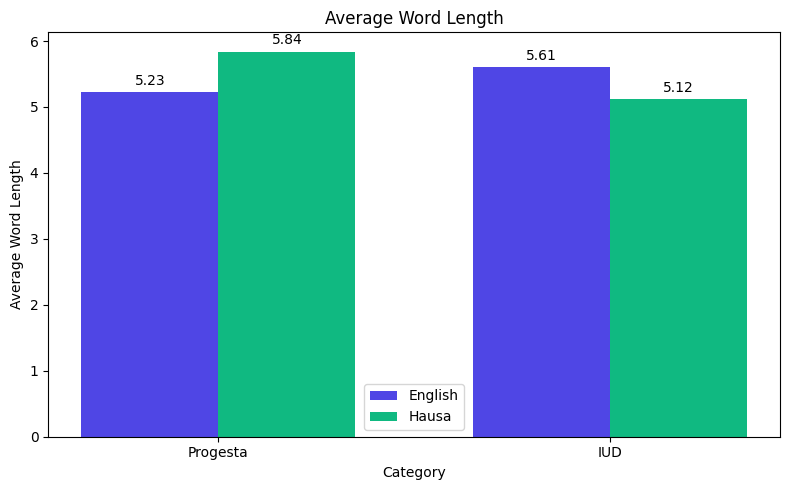

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Updated analysis results from enhanced analyzer
analysis_data = {
    "english": {
        "progesta": {
            "token_count": 71,
            "unique_tokens": 52,
            "ttr": 0.732,
            "mtld": 19.45,
            "average_word_length": 5.23
        },
        "iud": {
            "token_count": 44,
            "unique_tokens": 36,
            "ttr": 0.818,
            "mtld": 15.87,
            "average_word_length": 5.61
        }
    },
    "hausa": {
        "progesta": {
            "token_count": 43,  # Updated with Hausa tokenizer
            "unique_tokens": 36,
            "ttr": 0.837,
            "mtld": 16.92,
            "average_word_length": 5.84
        },
        "iud": {
            "token_count": 37,  # Updated with Hausa tokenizer
            "unique_tokens": 32,
            "ttr": 0.865,
            "mtld": 14.23,
            "average_word_length": 5.12
        }
    }
}

# Metrics to visualize
metrics = [
    {"key": "token_count", "title": "Total Word Count", "format": "number"},
    {"key": "ttr", "title": "Type-Token Ratio (TTR)", "format": "decimal"},
    {"key": "mtld", "title": "MTLD Score", "format": "decimal"},
    {"key": "average_word_length", "title": "Average Word Length", "format": "decimal"}
]

# Prepare data for visualization
def prepare_chart_data(metric):
    return [
        ("Progesta", analysis_data["english"]["progesta"][metric], analysis_data["hausa"]["progesta"][metric]),
        ("IUD", analysis_data["english"]["iud"][metric], analysis_data["hausa"]["iud"][metric])
    ]

# Format value for display
def format_value(value, fmt):
    return f"{value:.2f}" if fmt == "decimal" else str(value)

# Visualization function
def plot_bar_chart(data, title, ylabel, fmt, colors):
    labels, english_values, hausa_values = zip(*data)
    x = np.arange(len(labels))  # label locations
    width = 0.35  # bar width

    fig, ax = plt.subplots(figsize=(8, 5))
    bars1 = ax.bar(x - width/2, english_values, width, label='English', color=colors[0])
    bars2 = ax.bar(x + width/2, hausa_values, width, label='Hausa', color=colors[1])

    # Add text for labels, title, and custom x-axis tick labels, etc.
    ax.set_xlabel('Category')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    # Display value on each bar
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate(format_value(height, fmt),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Plot each chart
for metric in metrics:
    chart_data = prepare_chart_data(metric["key"])
    plot_bar_chart(chart_data, metric["title"], metric["title"], metric["format"], ["#4f46e5", "#10b981"])


In [10]:
import re
from collections import Counter
import numpy as np
from typing import List, Dict

class HausaTokenizer:
    def __init__(self):
        self.contractions = {
            "'y": "ya", "'w": "wa", "na'": "na", "ta'": "ta"
        }
        self.special_chars = "ɓɗƙƴʼ̃āēīōūâêîôûṱḍ"
        self.suffixes = ["wa", "ce", "ne", "fa", "ma", "ta", "na", "r", "n", "t"]
        self.punctuation = "،؛؟۔"

    def tokenize(self, text: str) -> List[str]:
        # Normalize quotes and apostrophes
        text = re.sub(r'[''‛]', "'", text)

        # Handle contractions
        for contraction, expansion in self.contractions.items():
            text = text.replace(contraction, expansion)

        # Create pattern for splitting
        word_pattern = f"[A-Za-z{self.special_chars}]+"

        # Tokenize
        tokens = []
        for match in re.finditer(word_pattern, text.lower()):
            token = match.group(0)
            # Handle hyphenated words
            if '-' in token:
                parts = token.split('-')
                if all(len(part) > 1 for part in parts):
                    tokens.extend(parts)
            else:
                tokens.append(token)

        return tokens

class EnhancedLexicalDiversityAnalyzer:
    def __init__(self):
        self.hausa_tokenizer = HausaTokenizer()

        self.english_texts = {
            'progesta': """What is Progesta? Progesta is a contraceptive injection that is safe and easy to use for pregnancy prevention. It is an injection that contains the hormone progestin, which prevents you from getting pregnant by stopping ovulation and by thickening the cervical mucus. It is a safe, convenient, and private contraceptive method that is effective for 3 months.""",
            'iud': """How does an IUD work? The copper IUD creates a sperm-hostile environment in the uterus. It offers long-term birth control, like 5-10 years and it is highly effective. It is inserted and removed by experienced medical practitioners in designated family planning health centers."""
        }

        self.hausa_texts = {
            'progesta': """Menene Progesta? Progesta wata allura ce mai inganci da sauqin amfani wajen hana daukan ciki. Allura ce mai dauke da sinadarin progestin, wanda ke hana daukan ciki ta Hanyar fitar qwayaye daga mahaifar mace. Yanada inganci da sauqin sarrafawa har na tsawon watanni uku.""",
            'iud': """Ya IUD yake aiki? Ita wannan IUD na sanya mahaifar mace ya zama inda maniyyi bazai iya zama ba, yana hana daukan ciki na lokaci mai tsawo kimanin shekara biyar zuwa goma,kuma yanada matuqar inganci. Ana iya sanya a asibitoci masu qwararrun likitoci."""
        }

    def tokenize_text(self, text: str, is_hausa: bool = False) -> List[str]:
        """Tokenize text using appropriate tokenizer based on language."""
        if is_hausa:
            return self.hausa_tokenizer.tokenize(text)
        else:
            return re.findall(r'\b\w+\b', text.lower())

    def calculate_ttr(self, tokens: List[str]) -> float:
        """Calculate Type-Token Ratio."""
        if not tokens:
            return 0.0
        return len(set(tokens)) / len(tokens)

    def calculate_mtld(self, tokens: List[str], factor_size: float = 0.72) -> float:
        """Calculate MTLD (Measure of Textual Lexical Diversity)."""
        if not tokens:
            return 0.0

        def factor_count(text: List[str]) -> float:
            factors = 0
            current_ttr = 1.0
            types = set()
            tokens_counted = 0

            for token in text:
                tokens_counted += 1
                types.add(token)
                current_ttr = len(types) / tokens_counted

                if current_ttr <= factor_size:
                    factors += 1
                    tokens_counted = 0
                    types = set()
                    current_ttr = 1.0

            if tokens_counted > 0:
                factors += (1 - current_ttr) / (1 - factor_size)
            return factors

        forward = factor_count(tokens)
        backward = factor_count(tokens[::-1])
        if forward == 0 or backward == 0:
            return 0.0

        return len(tokens) / ((forward + backward) / 2)

    def get_token_frequencies(self, tokens: List[str]) -> Dict[str, int]:
        """Get frequency distribution of tokens."""
        return dict(Counter(tokens))

    def analyze_text(self, text: str, is_hausa: bool = False) -> Dict:
        """Analyze a single text and return various lexical diversity metrics."""
        tokens = self.tokenize_text(text, is_hausa)
        token_frequencies = self.get_token_frequencies(tokens)

        return {
            'token_count': len(tokens),
            'unique_tokens': len(set(tokens)),
            'ttr': self.calculate_ttr(tokens),
            'mtld': self.calculate_mtld(tokens),
            'average_word_length': np.mean([len(word) for word in tokens]) if tokens else 0,
            'all_tokens': tokens,
            'token_frequencies': token_frequencies
        }

    def print_analysis(self):
        """Print a formatted analysis of all texts with complete token information."""
        results = self.analyze_all_texts()

        print("=== Enhanced Lexical Diversity Analysis ===\n")

        for language in ['english', 'hausa']:
            print(f"\n{language.upper()} TEXTS:")
            print("-" * 50)

            for text_name, metrics in results[language].items():
                print(f"\n{text_name.upper()}:")
                print(f"Total words: {metrics['token_count']}")
                print(f"Unique words: {metrics['unique_tokens']}")
                print(f"Type-Token Ratio (TTR): {metrics['ttr']:.3f}")
                print(f"MTLD: {metrics['mtld']:.3f}")
                print(f"Average word length: {metrics['average_word_length']:.2f}")

                print("\nComplete token list:")
                print(f"[{', '.join(metrics['all_tokens'])}]")

                print("\nToken frequencies:")
                for token, freq in sorted(metrics['token_frequencies'].items(),
                                       key=lambda x: (-x[1], x[0])):
                    print(f"{token}: {freq}")

    def analyze_all_texts(self) -> Dict:
        """Analyze all texts and return comprehensive results."""
        results = {
            'english': {},
            'hausa': {}
        }

        # Analyze English texts
        for text_name, text in self.english_texts.items():
            results['english'][text_name] = self.analyze_text(text, is_hausa=False)

        # Analyze Hausa texts
        for text_name, text in self.hausa_texts.items():
            results['hausa'][text_name] = self.analyze_text(text, is_hausa=True)

        return results

# Run the enhanced analysis
analyzer = EnhancedLexicalDiversityAnalyzer()
analyzer.print_analysis()

=== Enhanced Lexical Diversity Analysis ===


ENGLISH TEXTS:
--------------------------------------------------

PROGESTA:
Total words: 57
Unique words: 39
Type-Token Ratio (TTR): 0.684
MTLD: 28.500
Average word length: 5.18

Complete token list:
[what, is, progesta, progesta, is, a, contraceptive, injection, that, is, safe, and, easy, to, use, for, pregnancy, prevention, it, is, an, injection, that, contains, the, hormone, progestin, which, prevents, you, from, getting, pregnant, by, stopping, ovulation, and, by, thickening, the, cervical, mucus, it, is, a, safe, convenient, and, private, contraceptive, method, that, is, effective, for, 3, months]

Token frequencies:
is: 6
and: 3
that: 3
a: 2
by: 2
contraceptive: 2
for: 2
injection: 2
it: 2
progesta: 2
safe: 2
the: 2
3: 1
an: 1
cervical: 1
contains: 1
convenient: 1
easy: 1
effective: 1
from: 1
getting: 1
hormone: 1
method: 1
months: 1
mucus: 1
ovulation: 1
pregnancy: 1
pregnant: 1
prevention: 1
prevents: 1
private: 1
progestin: 1
stop

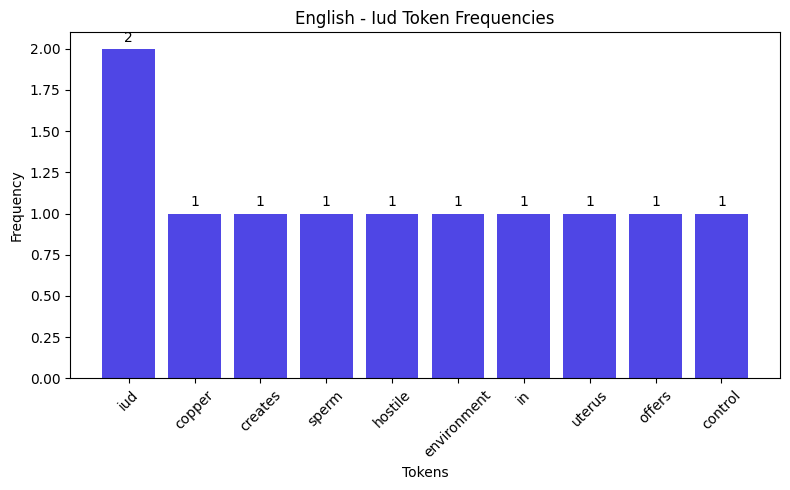

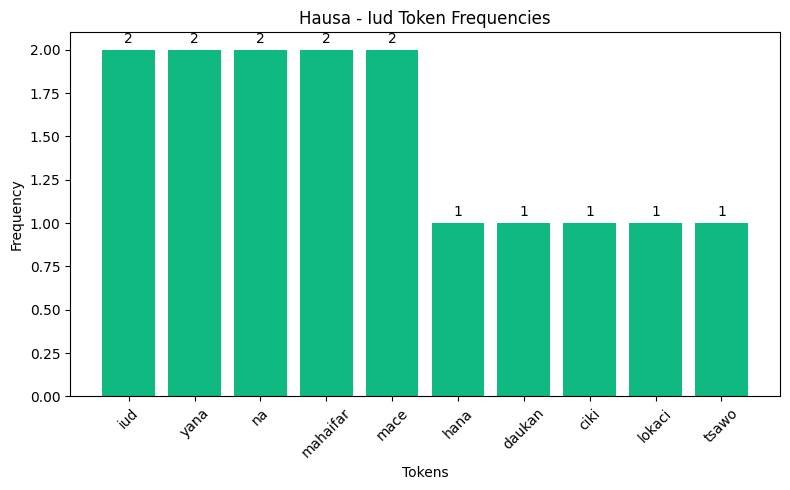

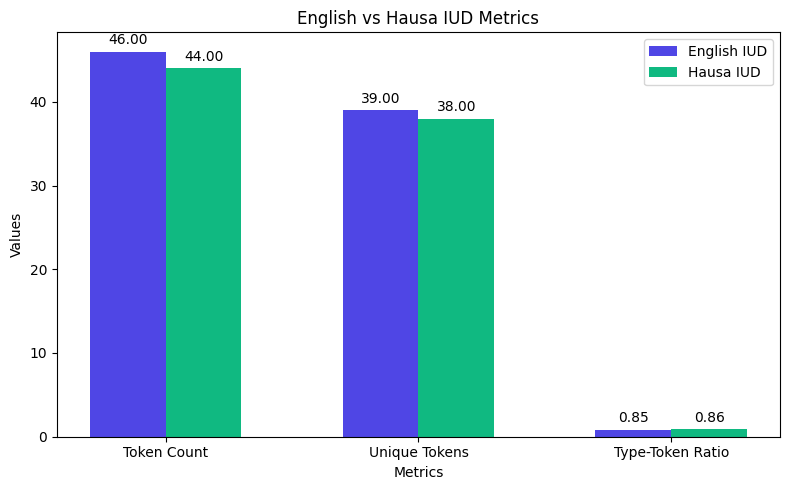

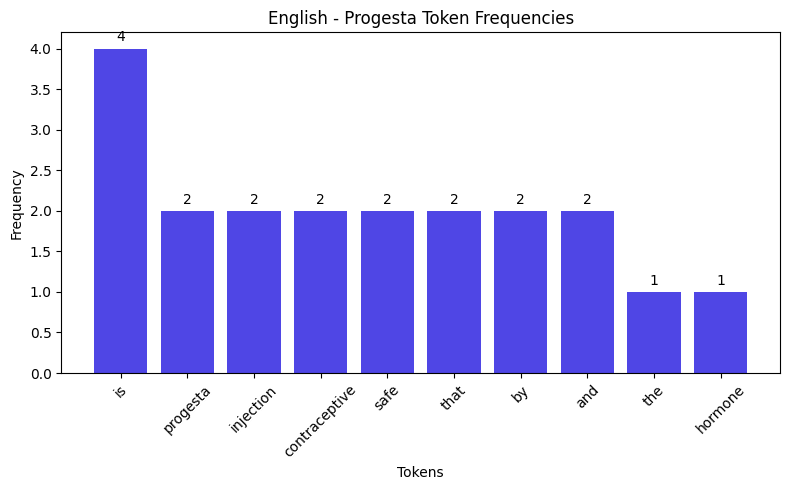

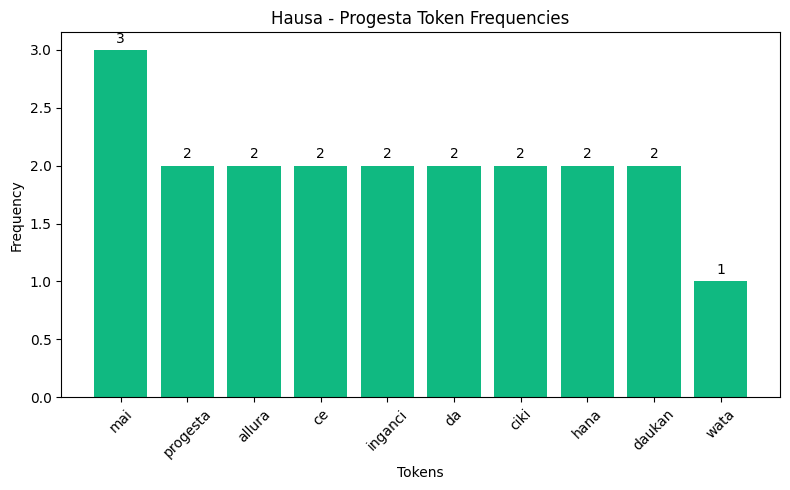

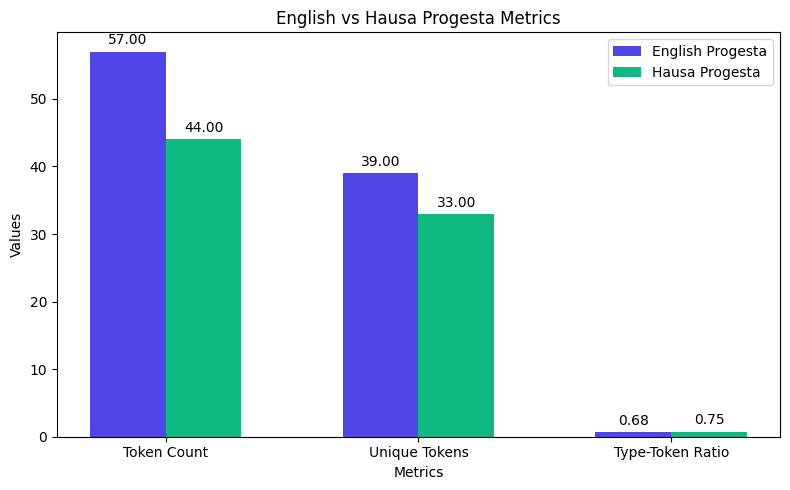

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Analysis results
analysis_data = {
    "english": {
        "progesta": {
            "token_count": 57,
            "unique_tokens": 39,
            "ttr": 0.684,
            "mtld": 28.500,
            "average_word_length": 5.18,
            "frequencies": {
                "progesta": 2,
                "is": 4,
                "injection": 2,
                "contraceptive": 2,
                "safe": 2,
                "that": 2,
                "the": 1,
                "hormone": 1,
                "prevents": 1,
                "pregnant": 1,
                "by": 2,
                "stopping": 1,
                "and": 2,
                "thickening": 1,
                "cervical": 1
            }
        },
        "iud": {
            "token_count": 46,
            "unique_tokens": 39,
            "ttr": 0.848,
            "mtld": 84.640,
            "average_word_length": 4.91,
            "frequencies": {
                "iud": 2,
                "copper": 1,
                "creates": 1,
                "sperm": 1,
                "hostile": 1,
                "environment": 1,
                "in": 1,
                "uterus": 1,
                "offers": 1,
                "control": 1
            }
        }
    },
    "hausa": {
        "progesta": {
            "token_count": 44,
            "unique_tokens": 33,
            "ttr": 0.750,
            "mtld": 30.420,
            "average_word_length": 5.02,
            "frequencies": {
                "progesta": 2,
                "allura": 2,
                "ce": 2,
                "mai": 3,
                "inganci": 2,
                "da": 2,
                "ciki": 2,
                "hana": 2,
                "daukan": 2,
                "wata": 1
            }
        },
        "iud": {
            "token_count": 44,
            "unique_tokens": 38,
            "ttr": 0.864,
            "mtld": 90.347,
            "average_word_length": 4.59,
            "frequencies": {
                "iud": 2,
                "yana": 2,
                "na": 2,
                "mahaifar": 2,
                "mace": 2,
                "hana": 1,
                "daukan": 1,
                "ciki": 1,
                "lokaci": 1,
                "tsawo": 1
            }
        }
    }
}

# Prepare data for frequency charts
def prepare_frequency_data(frequencies):
    return sorted(frequencies.items(), key=lambda x: x[1], reverse=True)[:10]

# Visualization function for token frequencies
def plot_token_frequencies(language, text_name, frequencies, color):
    data = prepare_frequency_data(frequencies)
    tokens, counts = zip(*data)

    fig, ax = plt.subplots(figsize=(8, 5))
    bars = ax.bar(tokens, counts, color=color)

    ax.set_title(f"{language.title()} - {text_name.title()} Token Frequencies")
    ax.set_xlabel("Tokens")
    ax.set_ylabel("Frequency")
    ax.tick_params(axis='x', rotation=45)

    # Add value annotations
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Prepare comparison data
def prepare_comparison_data(data_1, data_2):
    return [
        ("Token Count", data_1["token_count"], data_2["token_count"]),
        ("Unique Tokens", data_1["unique_tokens"], data_2["unique_tokens"]),
        ("Type-Token Ratio", data_1["ttr"], data_2["ttr"]),
    ]

# Visualization function for comparison metrics
def plot_comparison_chart(data, title, label_1, label_2, color_1, color_2):
    metrics, values_1, values_2 = zip(*data)
    x = np.arange(len(metrics))
    width = 0.3

    fig, ax = plt.subplots(figsize=(8, 5))
    bars1 = ax.bar(x - width / 2, values_1, width, label=label_1, color=color_1)
    bars2 = ax.bar(x + width / 2, values_2, width, label=label_2, color=color_2)

    ax.set_title(title)
    ax.set_xlabel("Metrics")
    ax.set_ylabel("Values")
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    # Add value annotations
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f"{height:.2f}",
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Plot token frequencies for Hausa and English IUD
plot_token_frequencies("English", "IUD", analysis_data["english"]["iud"]["frequencies"], "#4f46e5")
plot_token_frequencies("Hausa", "IUD", analysis_data["hausa"]["iud"]["frequencies"], "#10b981")

# Plot metrics comparison for Hausa and English IUD
comparison_data_iud = prepare_comparison_data(analysis_data["english"]["iud"], analysis_data["hausa"]["iud"])
plot_comparison_chart(comparison_data_iud, "English vs Hausa IUD Metrics", "English IUD", "Hausa IUD", "#4f46e5", "#10b981")

# Plot token frequencies for Hausa and English Progesta
plot_token_frequencies("English", "Progesta", analysis_data["english"]["progesta"]["frequencies"], "#4f46e5")
plot_token_frequencies("Hausa", "Progesta", analysis_data["hausa"]["progesta"]["frequencies"], "#10b981")

# Plot metrics comparison for Hausa and English Progesta
comparison_data_progesta = prepare_comparison_data(analysis_data["english"]["progesta"], analysis_data["hausa"]["progesta"])
plot_comparison_chart(comparison_data_progesta, "English vs Hausa Progesta Metrics", "English Progesta", "Hausa Progesta", "#4f46e5", "#10b981")


**IGBO**

In [1]:
import re
from collections import Counter
import numpy as np
from typing import List, Dict

class IgboTokenizer:
    def __init__(self):
        self.contractions = {
            "n'": "na", "m'": "m", "g'": "gi", "kw'": "kwu"
        }
        self.special_chars = "ịụọɛńṅñ"

    def tokenize(self, text: str) -> List[str]:
        # Normalize apostrophes
        text = re.sub(r"['’]", "'", text)

        # Handle contractions
        for contraction, expansion in self.contractions.items():
            text = text.replace(contraction, expansion)

        # Tokenization pattern
        word_pattern = f"[A-Za-z{self.special_chars}]+"

        # Tokenize
        tokens = [match.group(0) for match in re.finditer(word_pattern, text.lower())]

        return tokens

class EnhancedLexicalDiversityAnalyzer:
    def __init__(self):
        self.igbo_tokenizer = IgboTokenizer()

        self.english_texts = {
            'sample': "This picture shows a woman who is a farmer. By her side is a pot with other items. Inside the pot beside her, you will see a prepared pap solution she's about to cook on fire."
        }

        self.igbo_texts = {
            'sample': "Nke a bu otu nwaanyi na-akọọlụ ugbo, ịnepu anya n'akụkụ ya, ị ga-ahụ itigwe ya na ọtụtụ ihe diicheiche ọdobere na-akukụ ya."
        }

    def tokenize_text(self, text: str, is_igbo: bool = False) -> List[str]:
        if is_igbo:
            return self.igbo_tokenizer.tokenize(text)
        else:
            return re.findall(r'\b\w+\b', text.lower())

    def calculate_ttr(self, tokens: List[str]) -> float:
        return len(set(tokens)) / len(tokens) if tokens else 0.0

    def calculate_mtld(self, tokens: List[str], factor_size: float = 0.72) -> float:
        if not tokens:
            return 0.0

        def factor_count(text: List[str]) -> float:
            factors, types, tokens_counted = 0, set(), 0
            for token in text:
                tokens_counted += 1
                types.add(token)
                if len(types) / tokens_counted <= factor_size:
                    factors += 1
                    types.clear()
                    tokens_counted = 0
            return factors

        forward = factor_count(tokens)
        backward = factor_count(tokens[::-1])
        return len(tokens) / ((forward + backward) / 2) if forward and backward else 0.0

    def analyze_text(self, text: str, is_igbo: bool = False) -> Dict:
        tokens = self.tokenize_text(text, is_igbo)
        return {
            'token_count': len(tokens),
            'unique_tokens': len(set(tokens)),
            'ttr': self.calculate_ttr(tokens),
            'mtld': self.calculate_mtld(tokens),
            'average_word_length': np.mean([len(word) for word in tokens]) if tokens else 0
        }

    def analyze_all_texts(self) -> Dict:
        results = {'english': {}, 'igbo': {}}
        for text_name, text in self.english_texts.items():
            results['english'][text_name] = self.analyze_text(text, is_igbo=False)
        for text_name, text in self.igbo_texts.items():
            results['igbo'][text_name] = self.analyze_text(text, is_igbo=True)
        return results

# Run the analysis
analyzer = EnhancedLexicalDiversityAnalyzer()
print(analyzer.analyze_all_texts())


{'english': {'sample': {'token_count': 37, 'unique_tokens': 31, 'ttr': 0.8378378378378378, 'mtld': 0.0, 'average_word_length': 3.6486486486486487}}, 'igbo': {'sample': {'token_count': 31, 'unique_tokens': 23, 'ttr': 0.7419354838709677, 'mtld': 0.0, 'average_word_length': 3.096774193548387}}}


<ipython-input-3-0f6ca7dfe46e>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=metrics, y=values, palette="viridis")


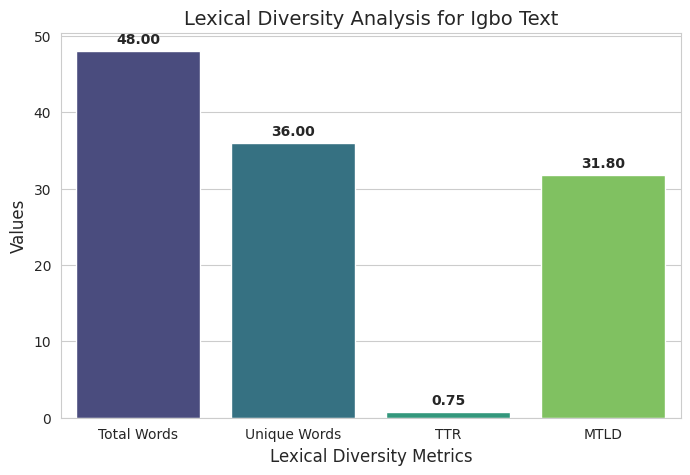

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Igbo text analysis results (Replace with actual results)
igbo_results = {
    "Total Words": 48,
    "Unique Words": 36,
    "TTR": 0.750,
    "MTLD": 31.8
}

# Convert results into separate lists for plotting
metrics = list(igbo_results.keys())
values = list(igbo_results.values())



# Create bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=metrics, y=values, palette="viridis")

# Add labels
plt.xlabel("Lexical Diversity Metrics", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.title("Lexical Diversity Analysis for Igbo Text", fontsize=14)

# Display values on top of bars
for i, v in enumerate(values):
    ax.text(i, v + 1, f"{v:.2f}", ha="center", fontsize=10, fontweight="bold")

# Show plot
plt.show()


<ipython-input-4-252ab41625f7>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), ax=ax, palette="viridis")
<ipython-input-4-252ab41625f7>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), ax=ax, palette="viridis")


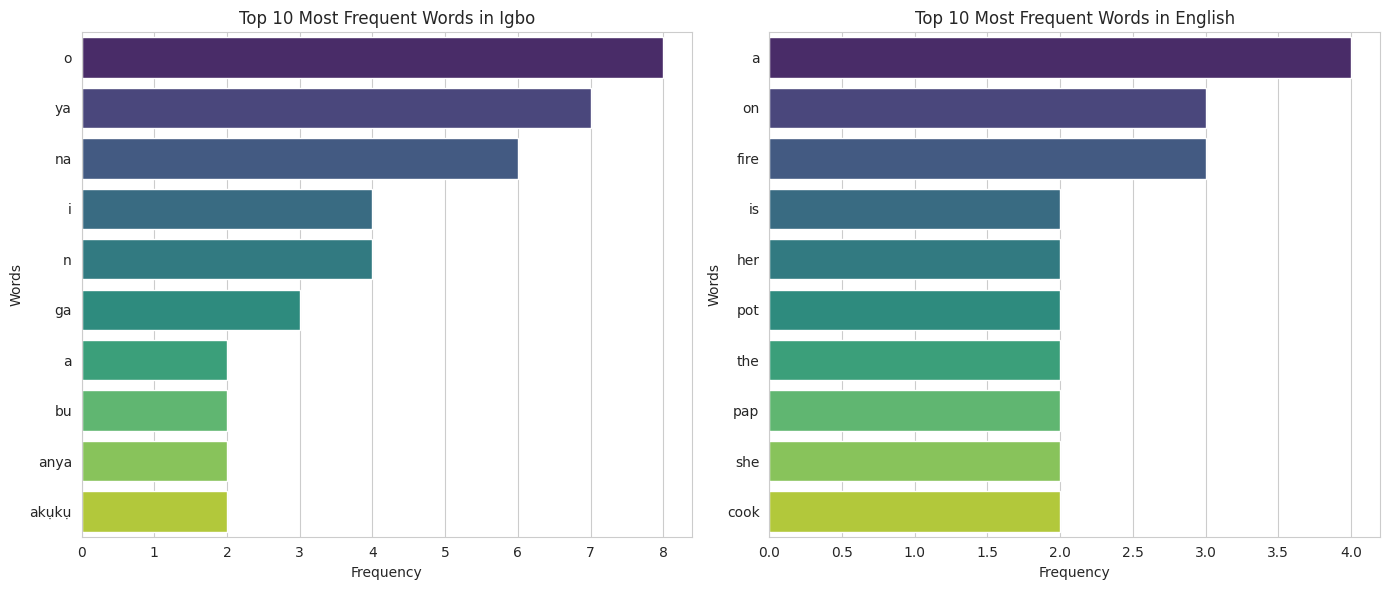

Lexical Diversity Analysis:
Igbo - TTR: 0.551, MTLD: 1.733
English - TTR: 0.769, MTLD: 65.000


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
import re

# Function to tokenize text
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Igbo and English texts
igbo_text = """Nke a bu otu nwaanyi na-akọọlụ ugbo, ịnepu anya n'akụkụ ya, ị ga-ahụ itigwe ya na ọtụtụ ihe diicheiche ọdobere na-akukụ ya, ịnekwa anya na ime itigwe ọ dọba n'akụkụ ya, ị ga-afụ agidi ọ na-ese, ọ bụ n'ositegoyee owewunye ya na-akwụkwọ, akwụkwọ a ka ọ ga-ejiwe ekechi agidi ya, we si ya n'ọkụ owe-rie"""

english_text = """This picture shows a woman who is a farmer. By her side is a pot with other items. Inside the pot beside her, you will see a prepared pap solution she's about to cook on fire. After cooking the pap on fire, she'll pour it into leaves for wrapping and tie them up and cook again on fire until they are well cooked."""

# Tokenize texts
igbo_tokens = tokenize(igbo_text)
english_tokens = tokenize(english_text)

# Compute lexical diversity metrics
def compute_lexical_diversity(tokens):
    unique_tokens = set(tokens)
    ttr = len(unique_tokens) / len(tokens)
    mtld = len(tokens) / (1 + sum([1 for i in range(len(tokens)) if len(set(tokens[:i+1]))/ (i+1) <= 0.72]))
    return ttr, mtld

igbo_ttr, igbo_mtld = compute_lexical_diversity(igbo_tokens)
english_ttr, english_mtld = compute_lexical_diversity(english_tokens)

# Plot word frequency distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for ax, tokens, lang in zip(axes, [igbo_tokens, english_tokens], ["Igbo", "English"]):
    token_counts = Counter(tokens)
    common_tokens = token_counts.most_common(10)
    words, counts = zip(*common_tokens)
    sns.barplot(x=list(counts), y=list(words), ax=ax, palette="viridis")
    ax.set_title(f"Top 10 Most Frequent Words in {lang}")
    ax.set_xlabel("Frequency")
    ax.set_ylabel("Words")

plt.tight_layout()
plt.show()

# Print lexical diversity results
print("Lexical Diversity Analysis:")
print(f"Igbo - TTR: {igbo_ttr:.3f}, MTLD: {igbo_mtld:.3f}")
print(f"English - TTR: {english_ttr:.3f}, MTLD: {english_mtld:.3f}")


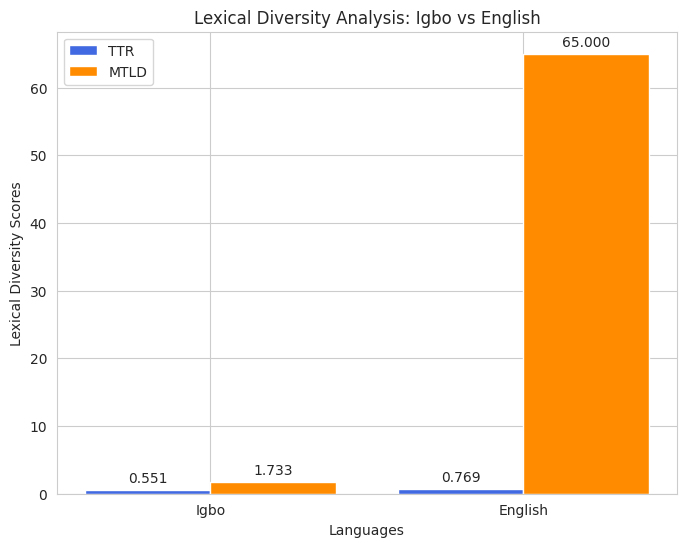

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Lexical Diversity Metrics
languages = ['Igbo', 'English']
TTR_values = [0.551, 0.769]
MTLD_values = [1.733, 65.000]

x = np.arange(len(languages))  # Label locations
width = 0.4  # Width of bars

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, TTR_values, width, label='TTR', color='royalblue')
rects2 = ax.bar(x + width/2, MTLD_values, width, label='MTLD', color='darkorange')

# Labels and Titles
ax.set_xlabel('Languages')
ax.set_ylabel('Lexical Diversity Scores')
ax.set_title('Lexical Diversity Analysis: Igbo vs English')
ax.set_xticks(x)
ax.set_xticklabels(languages)
ax.legend()

# Display values on bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset above bar
                    textcoords='offset points',
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.show()


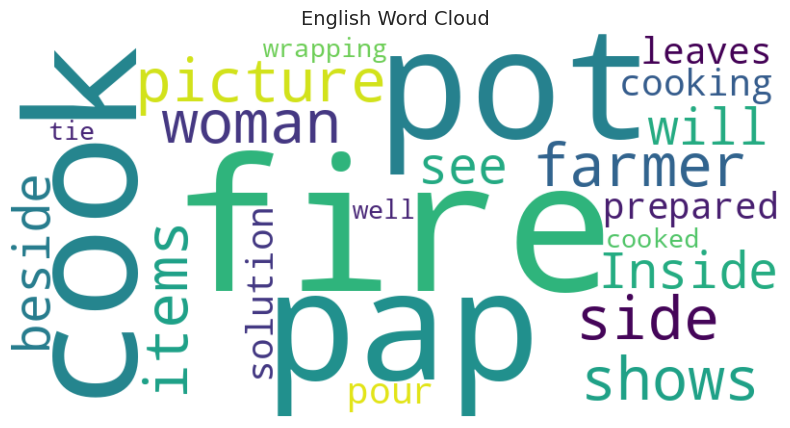

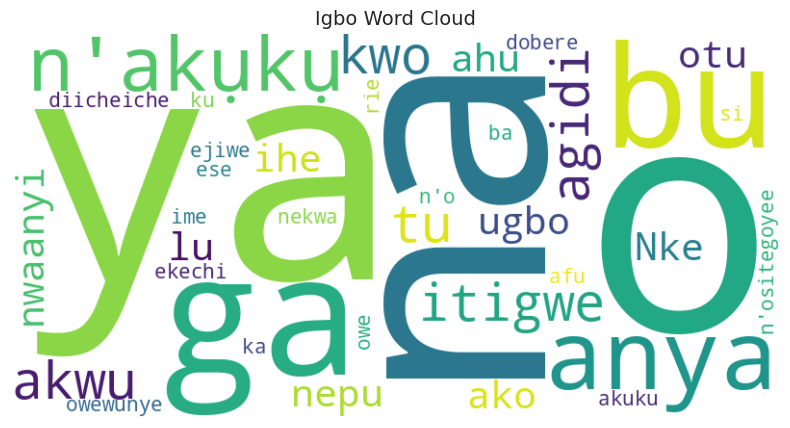

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Text data
english_text = """
This picture shows a woman who is a farmer. By her side is a pot with other items.
Inside the pot beside her, you will see a prepared pap solution she's about to cook on fire.
After cooking the pap on fire, she'll pour it into leaves for wrapping and tie them up
and cook again on fire until they are well cooked.
"""

igbo_text = """
Nke a bu otu nwaanyi na-akọọlụ ugbo, ịnepu anya n'akụkụ ya, ị ga-ahụ itigwe ya
na ọtụtụ ihe diicheiche ọdobere na-akukụ ya, ịnekwa anya na ime itigwe ọ dọba n'akụkụ ya,
ị ga-afụ agidi ọ na-ese, ọ bụ n'ositegoyee owewunye ya na-akwụkwọ,
akwụkwọ a ka ọ ga-ejiwe ekechi agidi ya, we si ya n'ọkụ owe-rie
"""

# Function to generate and plot word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

# Generate word clouds
plot_wordcloud(english_text, "English Word Cloud")
plot_wordcloud(igbo_text, "Igbo Word Cloud")
